### First populate mongodb from BB
See doA1.sh

In [3]:
import pymongo
client = pymongo.MongoClient (host="da1.eecs.utk.edu")
db = client ['fdac16']
issues = db ['A1_issues']
commits = db ['A1_commits']

### Lets create a reporter Assignee graph

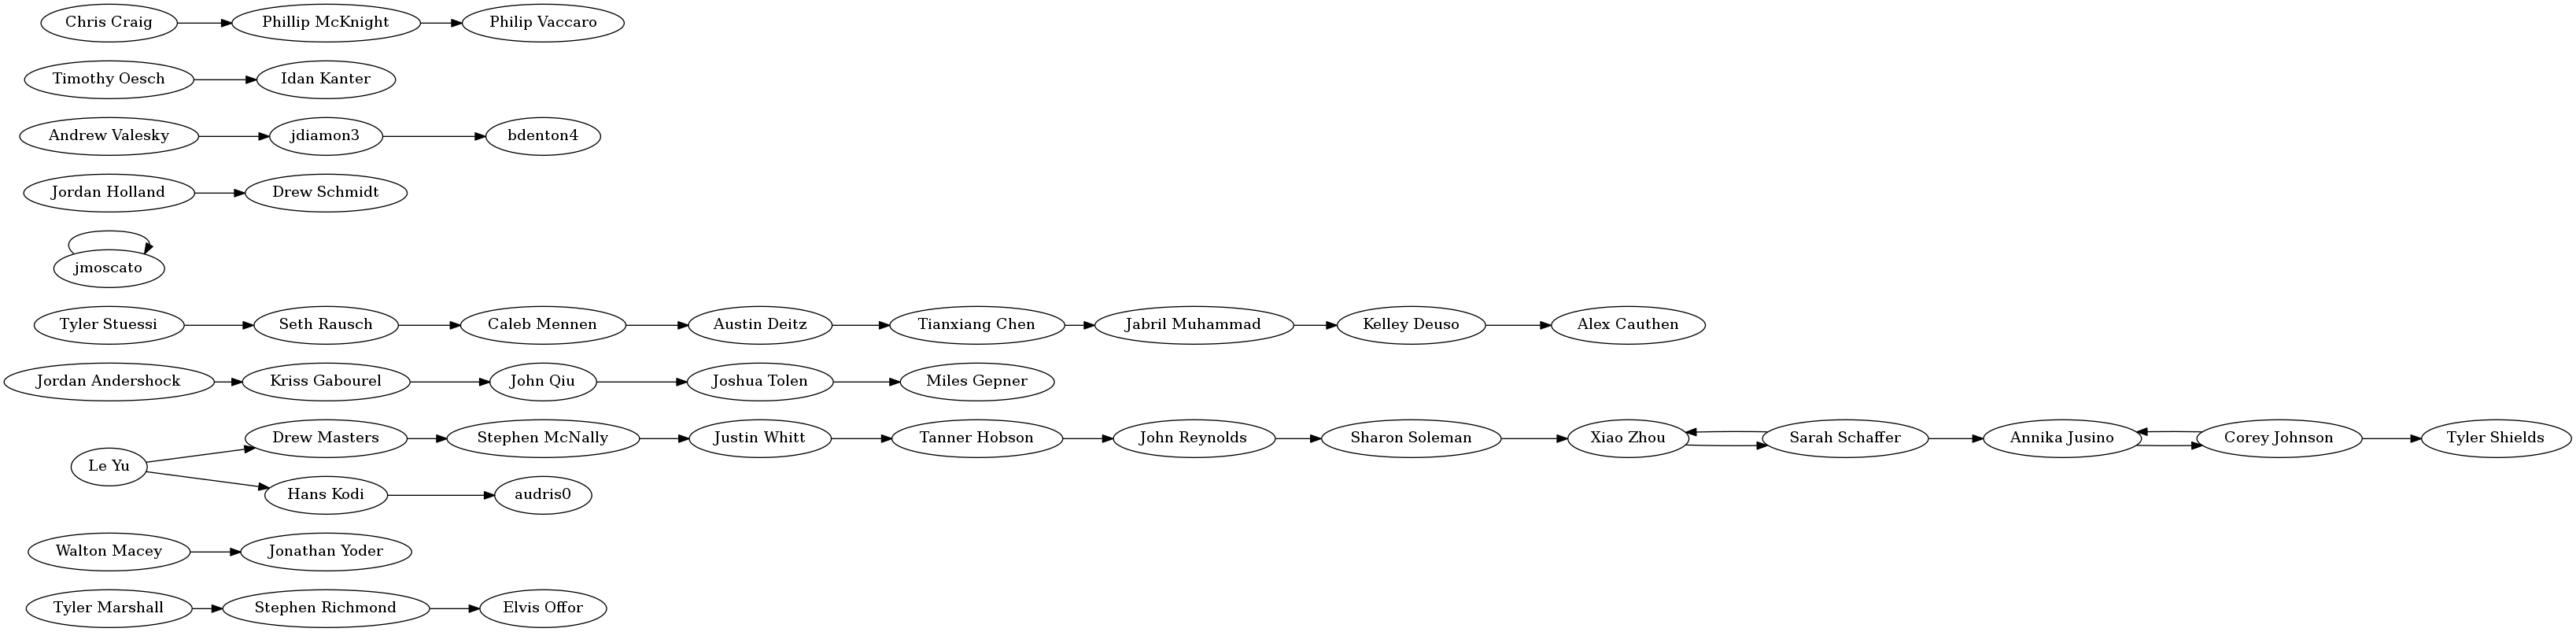

In [4]:
import networkx as nx
import json
from nxpd import draw

nxg = nx.DiGraph()

for iss in issues.find({},{'reporter.display_name':1,
                           'assignee.display_name':1, 
                           'content.raw':1}):
    #print ('--------------------')
    assig = 'None'
    if ('assignee' in iss): 
        assig = iss ['assignee']['display_name']
        nxg.add_edge (iss['reporter']['display_name'], assig)
        
    #print ('from ' + iss['reporter']['display_name'] + ' to ' + 
    #                   assig + ':' + iss['content']['raw'])

nxg.graph['ranksep'] = '"0.01 equally"'
nxg.graph['rankdir'] = 'LR'
draw(nxg, show='ipynb')    


In [5]:
# a more interactive version
from networkx.readwrite import json_graph
nld = json_graph.node_link_data(nxg)
json.dump(nld, open('issues.json','w'))
from IPython.display import IFrame
from IPython.core.display import display
# IPython Notebook can serve files and display them into
# inline frames. Prepend the path with the 'files' prefix.
viz_file = 'files/issues.html'
display(IFrame(viz_file, '100%', '600px'))

## Commits data are much more messy

In [6]:
for c in commits.find():
    aur = c['author']['raw']
    if not aur.startswith('Audris Mockus <audris@utk.edu>'):         
       print (c['author']['raw']+ ':' + c['repository']['full_name'])

LazerShark <LazerShark@bitbucket.org>:fdac/a1adeitz
kevinc9364 <kchiang@vols.utk.edu>:fdac/a1adeitz
tmarsha9 <tmarsha9@vols.utk.edu>:fdac/a1adeitz
pshires <pshires1@vols.utk.edu>:fdac/a1adeitz
tmarsha9 <tmarsha9@vols.utk.edu>:fdac/a1adeitz
Kris Brown <kbrown42@vols.utk.edu>:fdac/a1adeitz
ssoleman <ssoleman@vols.utk.edu>:fdac/a1adeitz
kevinc9364 <kchiang@vols.utk.edu>:fdac/a1adv1023
tmarsha9 <tmarsha9@vols.utk.edu>:fdac/a1adv1023
pshires <pshires1@vols.utk.edu>:fdac/a1adv1023
tmarsha9 <tmarsha9@vols.utk.edu>:fdac/a1adv1023
LazerShark <LazerShark@bitbucket.org>:fdac/a1adv1023
Kris Brown <kbrown42@vols.utk.edu>:fdac/a1adv1023
ssoleman <ssoleman@vols.utk.edu>:fdac/a1adv1023
ajusino <ajusino@vols.utk.edu>:fdac/a1ajusino
kevinc9364 <kchiang@vols.utk.edu>:fdac/a1ajusino
tmarsha9 <tmarsha9@vols.utk.edu>:fdac/a1ajusino
pshires <pshires1@vols.utk.edu>:fdac/a1ajusino
tmarsha9 <tmarsha9@vols.utk.edu>:fdac/a1ajusino
LazerShark <LazerShark@bitbucket.org>:fdac/a1ajusino
Kris Brown <kbrown42@vols.utk.

In [7]:
#lets figure out how to clean it
import networkx as nx
import json
from nxpd import draw

cmtG = nx.DiGraph()
for c in commits.find():
    aur = c['author']['raw']
    repo = c['repository']['full_name']
    #first remove irrelevant commits
    if not aur.startswith('Audris Mockus <audris@utk.edu>'): 
        wght = 1
        if (cmtG.has_edge (aur, repo)): 
            wght = cmtG.get_edge_data(aur, repo)['weight'] + 1
        cmtG .add_edge (aur, repo, weight=wght)

In [8]:
for n in cmtG.nodes():
    ngb = cmtG.successors(n)
    outDeg = 0
    tCmts = 0
    maxCmts = 0
    for n1 in ngb:
        outDeg += 1;
        nCmts = cmtG.get_edge_data(n, n1)['weight']
        print (n1+ ":" + str(nCmts))
    if outDeg > 0: print (n + ":" + str(outDeg) + ":" + str(nCmts))

fdac/a1wrathematics:1
fdac/a1waltonmacey:1
fdac/a1jholland34:1
fdac/a1jyoder5:1
fdac/a1bdenton4:1
fdac/a1gpickney:1
fdac/a1jmoscato:1
fdac/a1tmarsha9:1
fdac/a1jdiamon3:1
fdac/a1googlay:1
fdac/a1cjohn221:1
fdac/a1jreyno40:1
fdac/a1srichmo1:1
fdac/a1jqiu1:1
fdac/a1toesch:1
Jonathan Yoder <jonathandavidyoder@gmail.com>:15:1
fdac/a1jreyno40:2
jreyno40 <jreyno40@vols.utk.edu>:1:2
fdac/a1calebmennen:3
Caleb Mennen <cmennen@vols.utk.edu>:1:3
fdac/a1wrathematics:3
fdac/a1toesch:3
fdac/a1waltonmacey:3
fdac/a1jholland34:3
fdac/a1googlay:3
fdac/a1bdenton4:3
fdac/a1gpickney:1
fdac/a1jmoscato:1
fdac/a1tmarsha9:3
fdac/a1jdiamon3:1
fdac/a1cjohn221:1
fdac/a1jreyno40:3
fdac/a1srichmo1:3
fdac/a1jqiu1:3
fdac/a1smcnally:3
smcnally <mcnally@ornl.gov>:15:3
fdac/a1tchen21:4
tchen21 <tchen21>:1:4
fdac/a1kmccoy4:1
kmccoy4 <kmccoy4@vols.utk.edu>:1:1
fdac/a1wrathematics:1
fdac/a1srichmo1:1
fdac/a1jreyno40:1
fdac/a1waltonmacey:1
fdac/a1jholland34:3
fdac/a1googlay:1
fdac/a1bdenton4:1
fdac/a1jqiu1:1
fdac/a1toesch:1

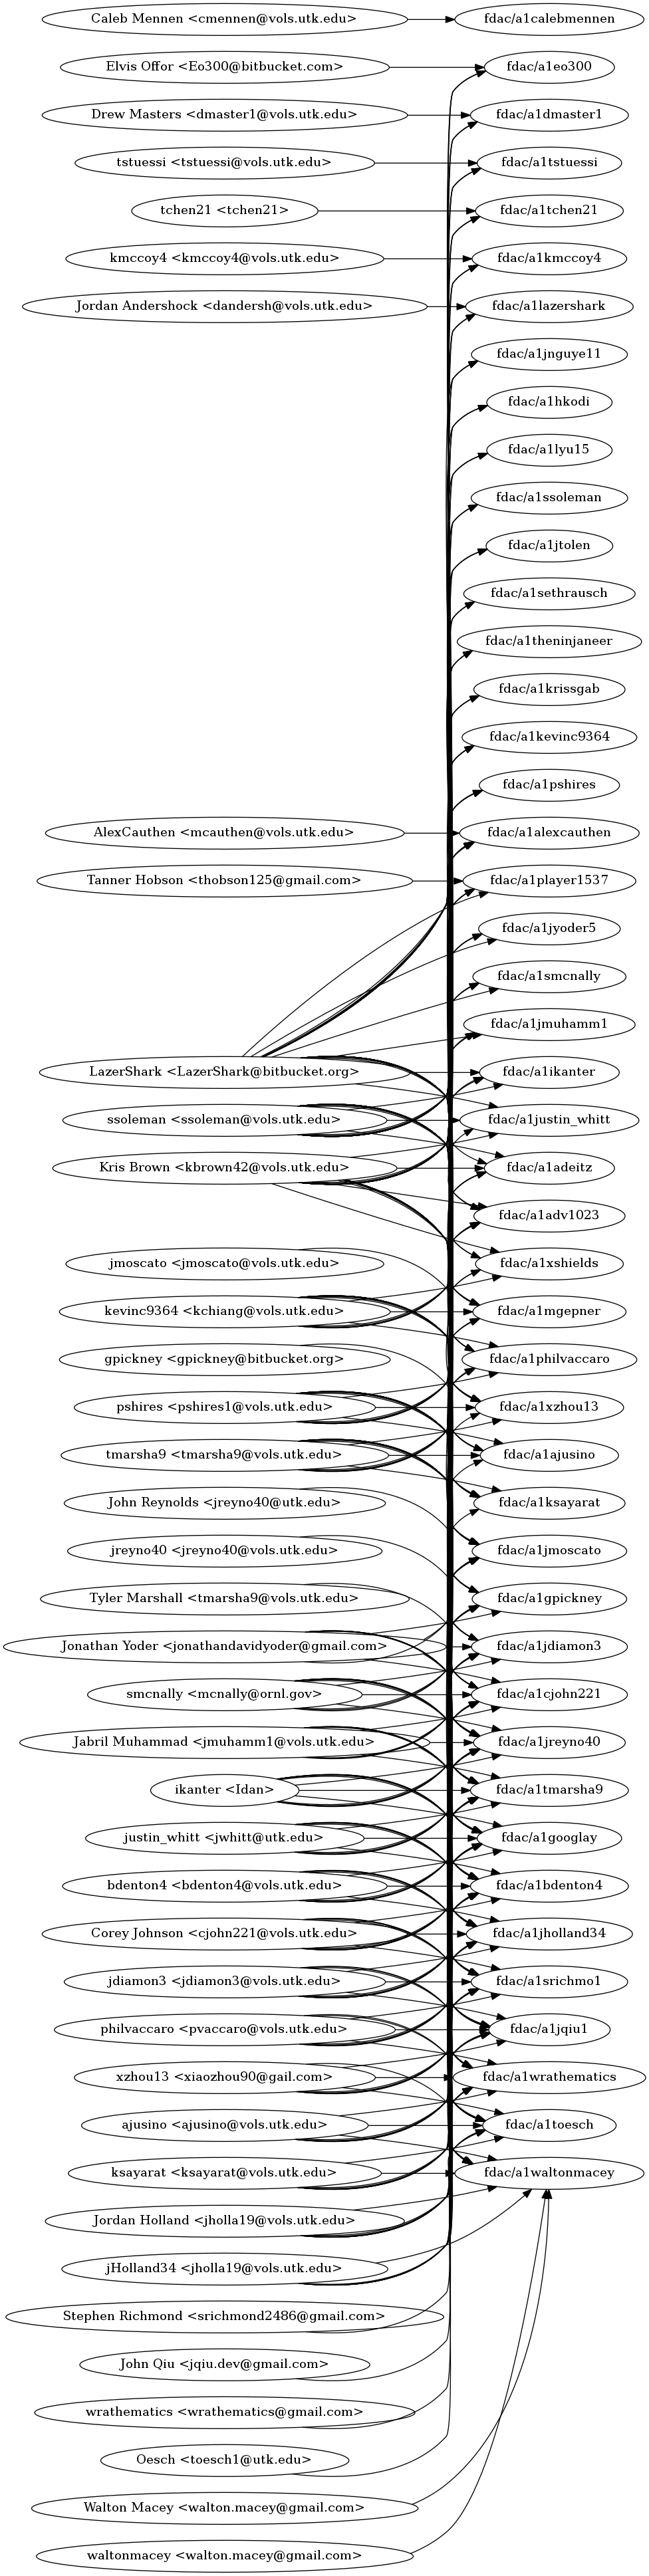

In [9]:
cmtG.graph['ranksep'] = '"0.01 equally"'
cmtG.graph['rankdir'] = 'LR'
draw(cmtG, show='ipynb')

In [10]:
# Lets try some data-driven cleaning
#Rule 1 - person to a single repo: that person is owner
cmtGclean = nx.DiGraph()
assigned = {}
for n in cmtG.nodes():
    ngb = cmtG.successors(n)
    outDeg = 0
    for n1 in ngb:
        outDeg += 1;
    if outDeg == 1:
        n1 = ngb.pop()
        cmtGclean .add_edge (n, n1, weight=cmtG.get_edge_data(n, n1)['weight'])
        assigned[n] = n1
        assigned[n1] = n        
        print (n + ":" + n1)

jreyno40 <jreyno40@vols.utk.edu>:fdac/a1jreyno40
Caleb Mennen <cmennen@vols.utk.edu>:fdac/a1calebmennen
tchen21 <tchen21>:fdac/a1tchen21
kmccoy4 <kmccoy4@vols.utk.edu>:fdac/a1kmccoy4
Stephen Richmond <srichmond2486@gmail.com>:fdac/a1srichmo1
gpickney <gpickney@bitbucket.org>:fdac/a1gpickney
John Qiu <jqiu.dev@gmail.com>:fdac/a1jqiu1
Drew Masters <dmaster1@vols.utk.edu>:fdac/a1dmaster1
Tyler Marshall <tmarsha9@vols.utk.edu>:fdac/a1tmarsha9
jmoscato <jmoscato@vols.utk.edu>:fdac/a1jmoscato
Jordan Andershock <dandersh@vols.utk.edu>:fdac/a1lazershark
Tanner Hobson <thobson125@gmail.com>:fdac/a1player1537
Elvis Offor <Eo300@bitbucket.com>:fdac/a1eo300
tstuessi <tstuessi@vols.utk.edu>:fdac/a1tstuessi
Oesch <toesch1@utk.edu>:fdac/a1toesch
waltonmacey <walton.macey@gmail.com>:fdac/a1waltonmacey
wrathematics <wrathematics@gmail.com>:fdac/a1wrathematics
AlexCauthen <mcauthen@vols.utk.edu>:fdac/a1alexcauthen
John Reynolds <jreyno40@utk.edu>:fdac/a1jreyno40
Walton Macey <walton.macey@gmail.com>:fda

In [12]:
# Rule 2 - if the repo matches id 
import re
for n in cmtG.nodes():
    if n in assigned: continue
    ngb = cmtG.successors(n)
    outDeg = 0
    sel = set ()
    for n1 in ngb:
        if n1 in assigned: continue
        outDeg += 1;
        sel.add(n1)
        nn = re.sub(r'^fdac/a1', '', n1)
        if re.compile(nn). search(n) is not None:
            assigned[n] = n1
            assigned[n1] = n
            print (n + ":" + n1)
            cmtGclean .add_edge (n, n1, weight=cmtG.get_edge_data(n, n1)['weight'])
            break
 

smcnally <mcnally@ornl.gov>:fdac/a1smcnally
Jabril Muhammad <jmuhamm1@vols.utk.edu>:fdac/a1jmuhamm1
ssoleman <ssoleman@vols.utk.edu>:fdac/a1ssoleman
jdiamon3 <jdiamon3@vols.utk.edu>:fdac/a1jdiamon3
kevinc9364 <kchiang@vols.utk.edu>:fdac/a1kevinc9364
ajusino <ajusino@vols.utk.edu>:fdac/a1ajusino
ikanter <Idan>:fdac/a1ikanter
bdenton4 <bdenton4@vols.utk.edu>:fdac/a1bdenton4
Corey Johnson <cjohn221@vols.utk.edu>:fdac/a1cjohn221
xzhou13 <xiaozhou90@gail.com>:fdac/a1xzhou13
ksayarat <ksayarat@vols.utk.edu>:fdac/a1ksayarat
justin_whitt <jwhitt@utk.edu>:fdac/a1justin_whitt
philvaccaro <pvaccaro@vols.utk.edu>:fdac/a1philvaccaro
pshires <pshires1@vols.utk.edu>:fdac/a1pshires


In [13]:
# Rule 3 - if the repo (sans numbers and first initial) matches id
for n in cmtG.nodes():
    if n in assigned: continue
    ngb = cmtG.successors(n)
    outDeg = 0
    sel = set ()
    for n1 in ngb:
        if n1 in assigned: continue
        nn = re.sub(r'^fdac/a1', '', n1)
        nn = re.sub(r'[0-9]*$', '', nn)
        nn = re.sub(r'^.', '', nn)
        #print (nn, n, n1)
        if re.compile(nn, flags=re.IGNORECASE). search(n) is not None:
            assigned[n] = n1
            assigned[n1] = n
            print (n + ":" + n1)
            cmtGclean .add_edge (n, n1, weight=cmtG.get_edge_data(n, n1)['weight'])
            break

Jonathan Yoder <jonathandavidyoder@gmail.com>:fdac/a1jyoder5
jHolland34 <jholla19@vols.utk.edu>:fdac/a1jholland34


In [15]:
#Some still not assigned :-(
for n in cmtG.nodes():
    if n in assigned: continue
    ngb = cmtG.successors(n)
    outDeg = 0
    sel = set ()
    for n1 in ngb:
        if n1 in assigned: continue
        print (n, n1, nn)

Kris Brown <kbrown42@vols.utk.edu> fdac/a1jnguye11 shields
Kris Brown <kbrown42@vols.utk.edu> fdac/a1lyu15 shields
Kris Brown <kbrown42@vols.utk.edu> fdac/a1adv1023 shields
Kris Brown <kbrown42@vols.utk.edu> fdac/a1googlay shields
Kris Brown <kbrown42@vols.utk.edu> fdac/a1krissgab shields
Kris Brown <kbrown42@vols.utk.edu> fdac/a1sethrausch shields
Kris Brown <kbrown42@vols.utk.edu> fdac/a1theninjaneer shields
Kris Brown <kbrown42@vols.utk.edu> fdac/a1jtolen shields
Kris Brown <kbrown42@vols.utk.edu> fdac/a1hkodi shields
Kris Brown <kbrown42@vols.utk.edu> fdac/a1mgepner shields
Kris Brown <kbrown42@vols.utk.edu> fdac/a1adeitz shields
Kris Brown <kbrown42@vols.utk.edu> fdac/a1xshields shields
Jordan Holland <jholla19@vols.utk.edu> fdac/a1googlay shields
LazerShark <LazerShark@bitbucket.org> fdac/a1jnguye11 shields
LazerShark <LazerShark@bitbucket.org> fdac/a1lyu15 shields
LazerShark <LazerShark@bitbucket.org> fdac/a1adv1023 shields
LazerShark <LazerShark@bitbucket.org> fdac/a1googlay sh

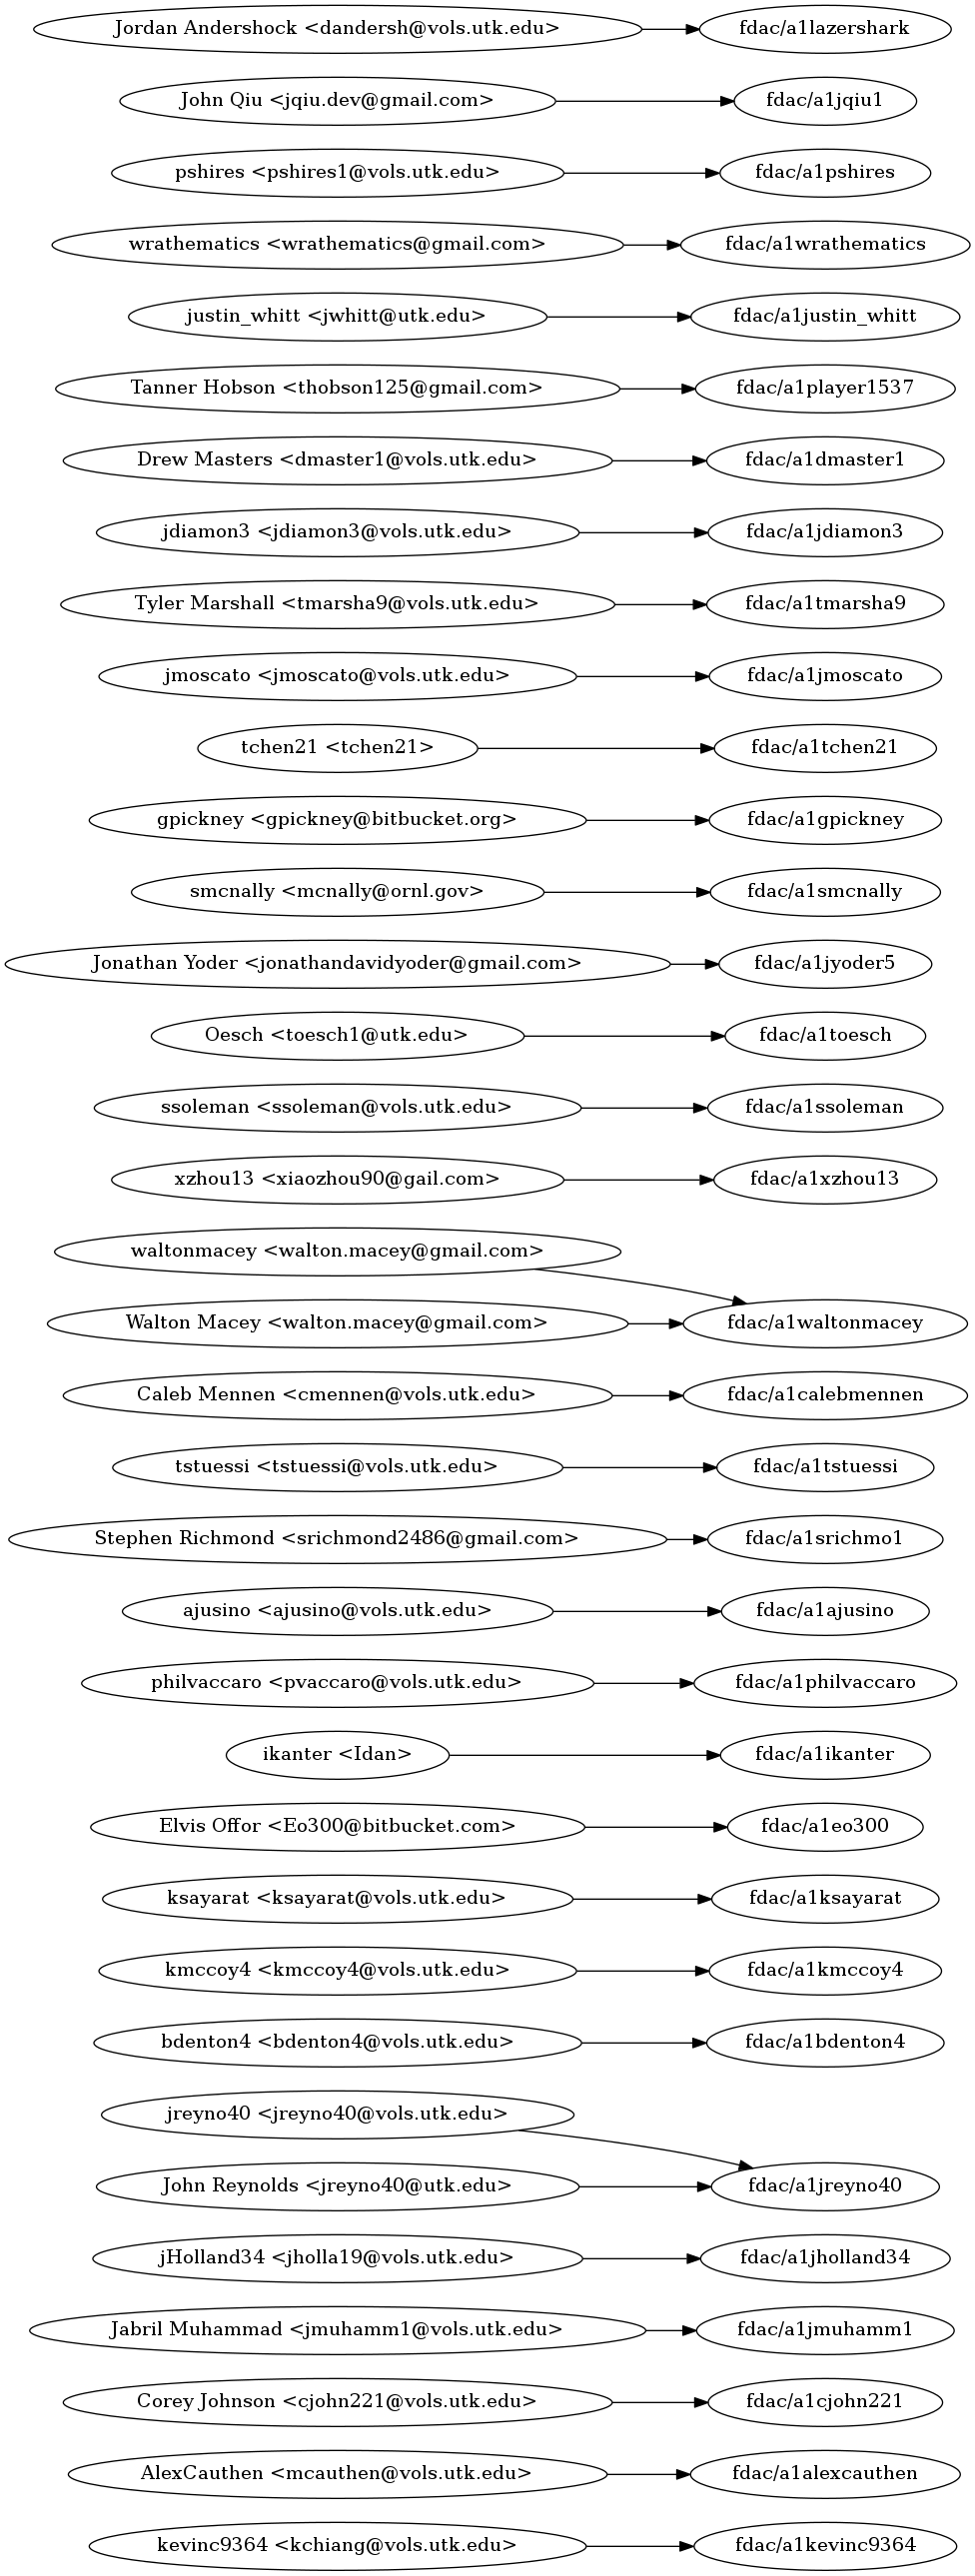

In [16]:
#Lets look at cclean graph
cmtGclean.graph['ranksep'] = '"0.01 equally"'
cmtGclean.graph['rankdir'] = 'LR'
draw(cmtGclean, show='ipynb')